# **PROJECT TITLE: REVENUE FORECASTING**

# 1. Importing all the necessary librabries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 2. Loading and Reading the Dataset

In [4]:
df=pd.read_csv("time_series_data.xls")

In [5]:
df

,Date,Revenue,Deposits,Loans
0,2020-01-01,102027.783641,207056.148068,165663.116440
1,2020-02-01,102011.399384,207059.215028,165680.857901
2,2020-03-01,102032.667041,207074.468731,165658.380638
3,2020-04-01,102078.180711,207158.263125,165707.999294
4,2020-05-01,102051.981223,207150.471908,165686.239211
5,2020-06-01,102057.099897,207090.374791,165669.939685
6,2020-07-01,102055.772436,207107.292823,165665.421595
7,2020-08-01,102079.970474,207252.485688,165756.830132
8,2020-09-01,102066.785420,207120.459231,165701.590556
9,2020-10-01,102098.083947,207208.982756,165788.710374


# 3. Data Inspection

In [6]:
df.columns

Index(['Date', 'Revenue', 'Deposits', 'Loans'], dtype='object')

In [7]:
df.shape

(48, 4)

In [8]:
df.describe()

,Revenue,Deposits,Loans
count,48.000000,48.000000,48.000000
mean,102142.246035,207289.384537,165831.157456
std,69.202479,129.913355,111.449175
min,102011.399384,207056.148068,165658.380638
25%,102093.139658,207204.128350,165746.538312
50%,102140.657365,207285.920635,165822.416116
75%,102200.568665,207378.290394,165907.571758
max,102298.413101,207546.384018,166062.481490


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      48 non-null     object 
 1   Revenue   48 non-null     float64
 2   Deposits  48 non-null     float64
 3   Loans     48 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


In [10]:
df.dtypes

Date         object
Revenue     float64
Deposits    float64
Loans       float64
dtype: object

# 4. Data Cleaning and Preparation

### 4.1 Converting 'Date' column into datetime

In [11]:
df['Date']=pd.to_datetime(df['Date'])

### 4.2 Set 'Date' as index

In [12]:
df.set_index('Date', inplace=True)

### 4.3 Resampling Data to Quaterly Frequency

In [13]:
quarterly_df=df.resample('M').mean() # it will change the time frequency of your time series data 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12016\2401991735.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_df=df.resample('M').mean() # it will change the time frequency of your time series data


In [14]:
quarterly_df

,Revenue,Deposits,Loans
Date,,,
2020-01-31,102027.783641,207056.148068,165663.116440
2020-02-29,102011.399384,207059.215028,165680.857901
2020-03-31,102032.667041,207074.468731,165658.380638
2020-04-30,102078.180711,207158.263125,165707.999294
2020-05-31,102051.981223,207150.471908,165686.239211
2020-06-30,102057.099897,207090.374791,165669.939685
2020-07-31,102055.772436,207107.292823,165665.421595
2020-08-31,102079.970474,207252.485688,165756.830132
2020-09-30,102066.785420,207120.459231,165701.590556


# 4. Exploratory Data Analysis (EDA)

### 4.1 Fin out the relationship between revenue over time

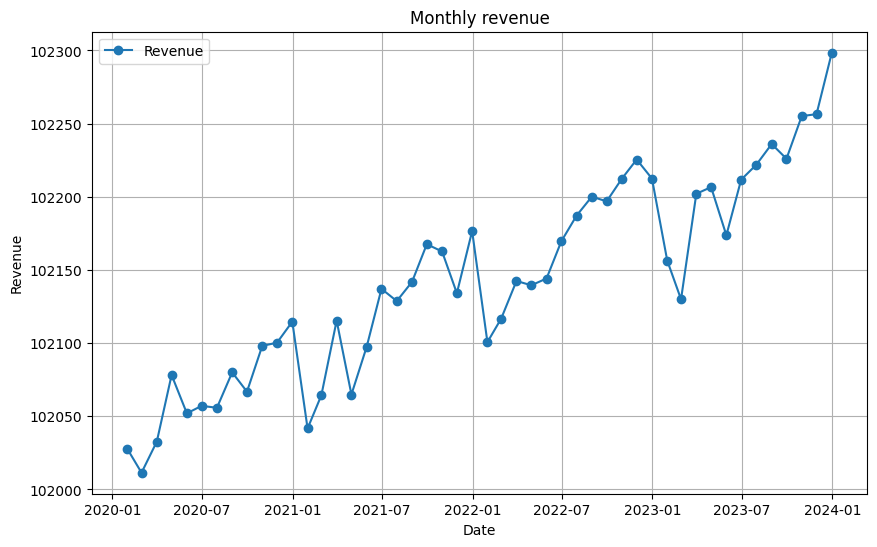

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(quarterly_df['Revenue'], label='Revenue', marker='o')
plt.title('Monthly revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# 6. Feature Selection

In [16]:
# select the revenue column for modeling 
revenue=quarterly_df['Revenue']

# 7. Model Building

### 7.1 Fit ARIMA model

**What is  arima?( Auto Regressive Integrated Moving Average)**
* It is a time series forcasting model used to predict the future value based on past observation
* Arima component
    * Auto regression (AR)(p)- relationship between an observation and its previous lagged value 
    * I(d)-integrated- number of times the data need to be differenced to make it stationary (remove trend)
    * MA(q)-Moving average- relationship between an observation and a residul error from a moving average model applied to lagged observation

**Use ARIMA if:**
* Data does not show seasonal patterns.
* The trend is more important than repeating cycles.
* For a simpler model.

ARIMA captures trend and short-term patterns, but not seasonality.

In [17]:
# fit an arima model 
arima_model=ARIMA(revenue, order=(1,1,1)) # 1 lag, 1 differnce, 1 lag of error
arima_fit=arima_model.fit()

### 7.1 Fit SARIMA model

What is SARIMA?
* SARIMA stands for Seasonal AutoRegressive Integrated Moving Average.
* It is an extension of the ARIMA model that includes seasonality, which is essential when your time series shows repeating patterns (like monthly or quarterly trends).
* Example:
    * ARIMA part: (p,d,q)
    * Seasonal part: yearly pattern with 12 months (P,D,Q,s)
    * Where:
        * p = Number of autoregressive (AR) terms
        * d = Number of differencing steps to make the series stationary
        * q = Number of moving average (MA) terms
        * P, D, Q = Same as above, but for the seasonal component
        * s = Seasonal period (e.g., 12 for monthly data with yearly seasonality)

**Use SARIMA if:**
* Data does show seasonal behavior (e.g., monthly sales, quarterly revenue, temperature).
* Repeating patterns can be observed at regular intervals.
* Better forecasts for cyclical behavior.

SARIMA adds a seasonal layer on top of ARIMA — it handles both trend and seasonality.


In [18]:
# fit a sarima model( with seasonality)
sarima_model=SARIMAX(revenue, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit=sarima_model.fit()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# 8. Forecasting

In [19]:
# farcast the next 12 months
forecast_step=12

# forcast using arima and sarima

arima_forecast=arima_fit.forecast(steps=forecast_step)
sarima_forecast=sarima_fit.forecast(steps=forecast_step)

print("ARIMA FORECAST: " , arima_forecast.values)
print("SARIMA FORECAST:", sarima_forecast.values)

ARIMA FORECAST:  [102285.55302262 102285.18738256 102285.17698661 102285.17669103
 102285.17668263 102285.17668239 102285.17668238 102285.17668238
 102285.17668238 102285.17668238 102285.17668238 102285.17668238]
SARIMA FORECAST: [102212.17147713 102206.97302127 102251.43658197 102249.98476872
 102243.03731741 102271.35932382 102277.01615504 102292.65116648
 102291.77339096 102310.08196816 102307.58038831 102325.84103335]


# 9. Creating Future Date Ranges

In [20]:
# create the future dates (forecasting ) that comes after the last date in your revenue
future_dates=pd.date_range(start=revenue.index[-1]+pd.offsets.MonthBegin(1), periods=forecast_step, freq='M')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12016\4011385137.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates=pd.date_range(start=revenue.index[-1]+pd.offsets.MonthBegin(1), periods=forecast_step, freq='M')


# 10. Visually Comparing the Forecasting by ARIMA And SARIMA

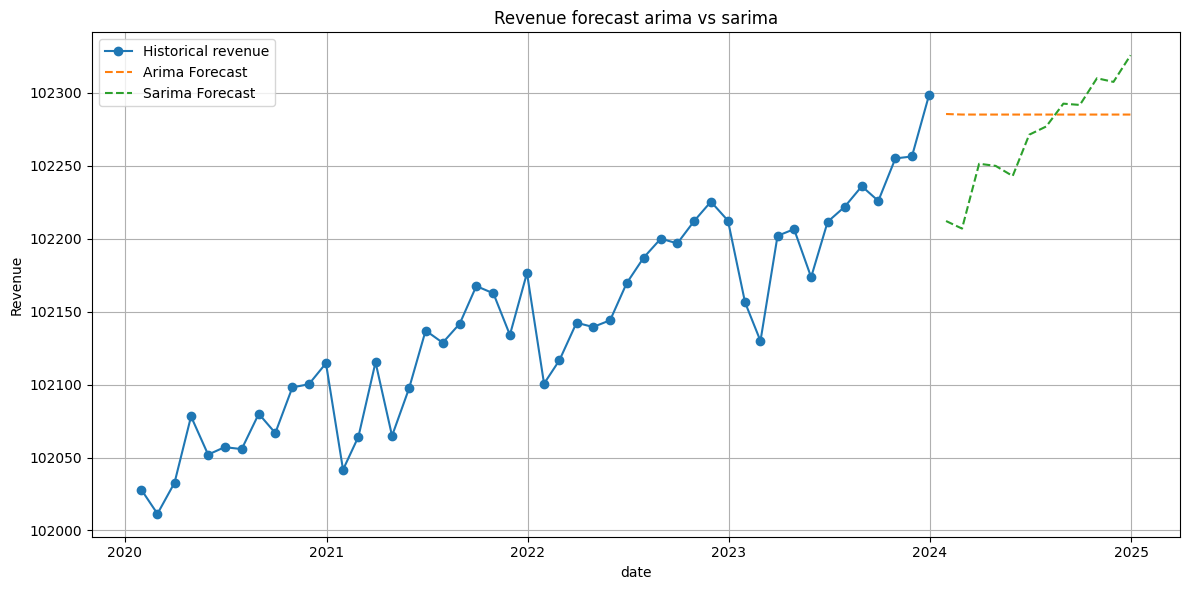

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(revenue.index, revenue, label='Historical revenue', marker='o')
plt.plot(future_dates, arima_forecast, label='Arima Forecast', linestyle='--')
plt.plot(future_dates, sarima_forecast, label='Sarima Forecast', linestyle='--')
plt.title("Revenue forecast arima vs sarima")
plt.xlabel('date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Advanced SARIMA Forecasting (Quarterly)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12016\1553788272.py:7: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates=pd.date_range(revenue.index[-1]+pd.offsets.QuarterEnd(1), periods=forecast_steps, freq='Q')


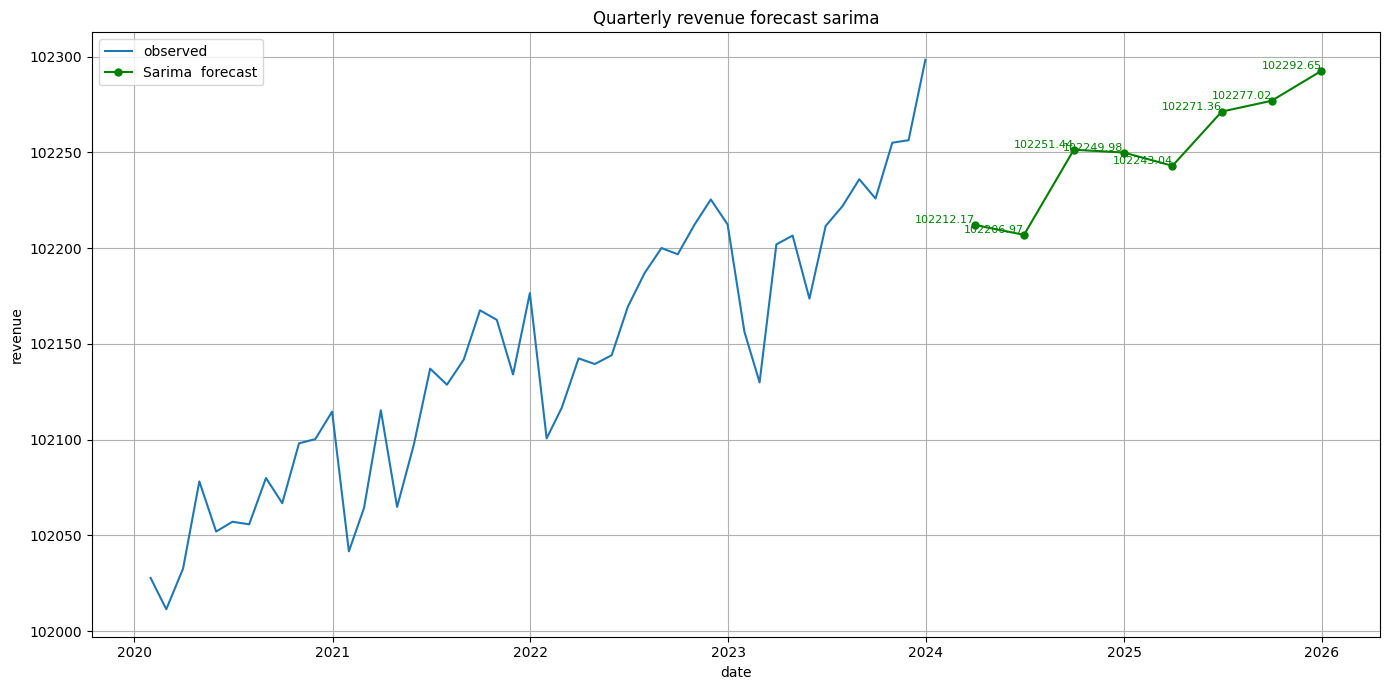


 Sarima Forecasted Revenue
At 2024-03-31: revenue=102212.17
At 2024-06-30: revenue=102206.97
At 2024-09-30: revenue=102251.44
At 2024-12-31: revenue=102249.98
At 2025-03-31: revenue=102243.04
At 2025-06-30: revenue=102271.36
At 2025-09-30: revenue=102277.02
At 2025-12-31: revenue=102292.65


In [23]:
#Forecast next 8 quarters using SARIMA
forecast_steps=8
sarima_forecast_obj=sarima_fit.get_forecast(steps=forecast_steps)
sarima_pred_mean=sarima_forecast_obj.predicted_mean

#Generate future quarterly dates
future_dates=pd.date_range(revenue.index[-1]+pd.offsets.QuarterEnd(1), periods=forecast_steps, freq='Q')

# Visualizing Quarterly Forecast with Annotations
plt.figure(figsize=(14, 7))
plt.plot(revenue.index, revenue, label='observed')
plt.plot(future_dates, sarima_pred_mean, label='Sarima  forecast', color='green', marker='o', markersize=5)

for date, value in zip(future_dates, sarima_pred_mean):
    plt.text(date, value, f"{value:.2f}", ha='right', va='bottom', fontsize=8, color='green')

plt.title("Quarterly revenue forecast sarima")
plt.xlabel('date')
plt.ylabel('revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Printing Forecasted Valu
print("\n Sarima Forecasted Revenue")
for date, value in zip(future_dates, sarima_pred_mean):
    print(f"At {date.date()}: revenue={value:.2f}")

